Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [28]:
%matplotlib inline

import thinkstats2
import thinkplot
import nsfg
import numpy as np
df = nsfg.ReadFemPreg()


Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

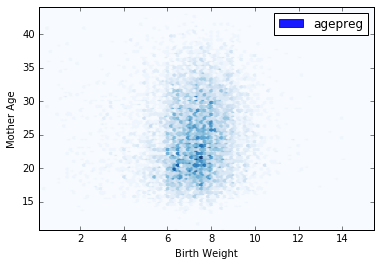

In [29]:
thinkplot.HexBin(df.totalwgt_lb, df.agepreg, alpha=0.9)
thinkplot.Show(xlabel='Birth Weight', ylabel='Mother Age')

As it can be seen, there doesn't appear to be very much of a link between mother's age and birth weight. It is shown that the ages of the mothers vary from roughly 15 to 40, and within that range there are mothers with birth weights of a range between 2 to 11 pounds, making it dififcult to make much of a connection. 

In [30]:
df = df.dropna(subset=['totalwgt_lb', 'agepreg'])
bins = np.arange(0, 40, 5)
indices = np.digitize(df.totalwgt_lb, bins)
groups = df.groupby(indices)

(1, 425)
(2, 8438)
(3, 174)
(4, 1)


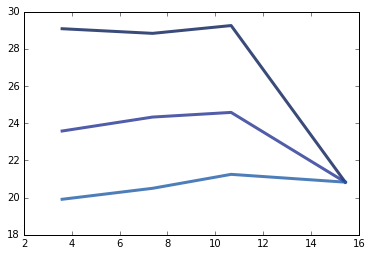

In [31]:
for i, group in groups:
    print(i, len(group))
    weight = [group.totalwgt_lb.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.agepreg) for i, group in groups]
    
for percent in [75, 50, 25]:
    ages = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(weight, ages, label=label)

In [32]:
thinkstats2.Corr(df.totalwgt_lb, df.agepreg)

0.068833970354109028

In [33]:
thinkstats2.SpearmanCorr(df.totalwgt_lb, df.agepreg)

0.094610041096582262

These two calculations are pretty far apart in value; for Pearson's correlation, there is not a large chance that the relationship is linear. For Spearman's correlation, there is an improvement due to the filtering of outliers, suggesting that there was either a large number of outliers or the value of the outliers differed greatly. 